In [37]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']



np.linspace(5, 50, 10)

array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50.])

c:\Users\nikla\miniconda3\envs\DLRK\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


array([1.21576655e-06, 2.61928962e-06, 5.64308842e-06, 1.21576655e-05,
       2.61928962e-05, 5.64308842e-05, 1.21576655e-04, 2.61928962e-04,
       5.64308842e-04, 1.21576655e-03])

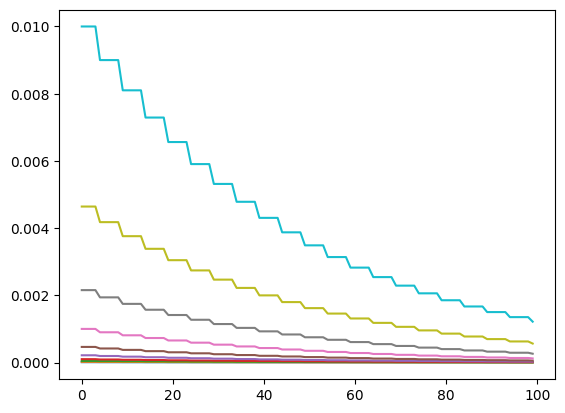

In [49]:
network  = torch.nn.Linear(10, 10)
# optim = torch.optim.SGD(network.parameters())

# scheduler = torch.optim.lr_scheduler.ConstantLR(optim, factor=1)
n_epochs = 100
lr = np.logspace(-5, -2, 10)
learning_rate = np.empty((len(lr), n_epochs))
for lr_idx, lr in enumerate(lr):
    optim = torch.optim.AdamW(network.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optim, T_max=200, eta_min=1e-6)
    # scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=lr, total_steps=200)
    scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=5, gamma=0.5)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optim, T_0=10, )
    scheduler = torch.optim.lr_scheduler.CyclicLR(optim, base_lr=lr, max_lr=1e-2)
    scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=5, gamma=0.9)
    for epoch in range(n_epochs):
        scheduler.step()
        learning_rate[lr_idx, epoch] = get_lr(optim)


plt.plot(learning_rate.T)
# plt.yscale("log")
learning_rate[:, -1]